In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import Training and Test Data
#titanic_df = pd.read_csv("https://raw.githubusercontent.com/Chen2870/bax452/master/train.csv")
#test_df    = pd.read_csv("https://raw.githubusercontent.com/Chen2870/bax452/master/test.csv")

In [4]:
titanic_df = pd.read_csv("train_titanic.csv")

In [5]:
#Display training dataframe
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
test_df = pd.read_csv("test_titanic.csv")

###Data Exploration

In [7]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [8]:
#titanic_df.head()

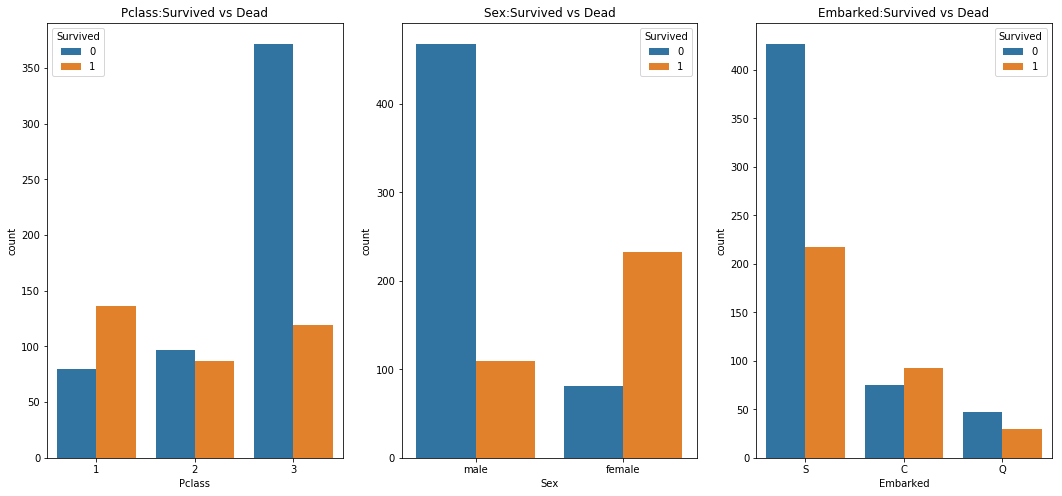

In [9]:
#Explore data: the portion of people who survived by Pclass, Sex, Embarked, Age
f,ax=plt.subplots(1,3,figsize=(18,8))
sns.countplot('Pclass',hue='Survived',data=titanic_df,ax=ax[0])
ax[0].set_title('Pclass:Survived vs Dead')
sns.countplot('Sex',hue='Survived',data=titanic_df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
sns.countplot('Embarked',hue='Survived',data=titanic_df,ax=ax[2])
ax[2].set_title('Embarked:Survived vs Dead')
plt.show()

In [10]:
#Explore the relationship between survival rate and age
#Replace NA data with the most frequently appeared data
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].mean()).astype('int')

In [11]:
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean()).astype('int')

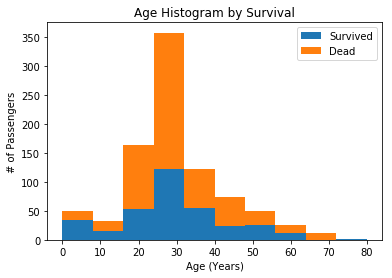

In [12]:
#Explore the relationship between survival rate and age
plt.hist(x = [titanic_df[titanic_df['Survived']==1]['Age'], titanic_df[titanic_df['Survived']==0]['Age']], 
         stacked=True, label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

###Feature Engineering

###Name

In [13]:
name = titanic_df['Name']

In [14]:
name_t = test_df['Name']

In [15]:
#name.head(20)

In [16]:
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

In [17]:
titanic_df['Title'] = titanic_df['Name'].apply(get_title)
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [18]:
test_df['Title'] = test_df['Name'].apply(get_title)
test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [19]:
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

In [20]:
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

In [21]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic_df['Title'] = titanic_df['Title'].map(title_mapping)
titanic_df['Title'] = titanic_df['Title'].fillna(0)

In [22]:
test_df['Title'] = test_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].fillna(0)

In [23]:
#titanic_df.head(10)

###Family Size

In [24]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [25]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [26]:
#titanic_df.head(10)

###Gender

In [27]:
titanic_df['Sex'] = titanic_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)


In [28]:
test_df['Sex'] = test_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)


###Embarked

In [29]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna("S").map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [31]:
test_df['Embarked'] = test_df['Embarked'].fillna("S").map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

###Age

In [32]:
#categorize age into five
age_avg = titanic_df['Age'].mean()
age_std = titanic_df['Age'].std()
titanic_df['CategoricalAge'] = pd.cut(titanic_df['Age'], 5)

In [33]:
#Map Age
titanic_df.loc[titanic_df['Age'] <= 16, 'Age'] = 0
titanic_df.loc[(titanic_df['Age'] > 16) & (titanic_df['Age'] <= 32), 'Age'] = 1
titanic_df.loc[(titanic_df['Age'] > 32) & (titanic_df['Age'] <= 48), 'Age'] = 2
titanic_df.loc[(titanic_df['Age'] > 48) & (titanic_df['Age'] <= 64), 'Age'] = 3
titanic_df.loc[titanic_df['Age'] > 64, 'Age'] = 4 ;

In [34]:
#Map Age for test_df
test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
test_df.loc[test_df['Age'] > 64, 'Age'] = 4 ;

In [35]:
#titanic_df.head(10)

###Fare

In [36]:
#Categorize Fare
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].mean())
titanic_df['CategoricalFare'] = pd.qcut(titanic_df['Fare'], 4)

In [37]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [38]:
#Map Fare
titanic_df.loc[titanic_df['Fare'] <= 7.91, 'Fare'] = 0
titanic_df.loc[(titanic_df['Fare'] > 7.91) & (titanic_df['Fare'] <= 14.454), 'Fare'] = 1
titanic_df.loc[(titanic_df['Fare'] > 14.454) & (titanic_df['Fare'] <= 31), 'Fare']   = 2
titanic_df.loc[titanic_df['Fare'] > 31, 'Fare'] = 3
titanic_df['Fare'] = titanic_df['Fare'].astype(int)

In [39]:
#Map Fare for test_df
test_df.loc[test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare']   = 2
test_df.loc[test_df['Fare'] > 31, 'Fare'] = 3
test_df['Fare'] = test_df['Fare'].astype(int)

In [40]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,CategoricalAge,CategoricalFare
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,1,2,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,3,2,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,2,1,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,3,2,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,1,1,"(32.0, 48.0]","(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",1,1,0,0,330877,1,NaN,2,1,1,"(16.0, 32.0]","(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",1,3,0,0,17463,3,E46,0,1,1,"(48.0, 64.0]","(31.0, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0,3,1,349909,2,NaN,0,4,5,"(-0.08, 16.0]","(14.454, 31.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,1,0,2,347742,1,NaN,0,3,3,"(16.0, 32.0]","(7.91, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0,1,0,237736,2,NaN,1,3,2,"(-0.08, 16.0]","(14.454, 31.0]"


In [41]:
###Cabin

In [42]:
titanic_df['Has_Cabin'] = titanic_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [43]:
test_df['Has_Cabin'] = test_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [44]:
###Drop Elements

In [45]:
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','CategoricalAge', 'CategoricalFare'], axis = 1)

In [46]:
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp'], axis = 1)

In [47]:
titanic_df.head(10)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Title,FamilySize,Has_Cabin
0,0,3,1,1,0,0,0,1,2,0
1,1,1,0,2,0,3,1,3,2,1
2,1,3,0,1,0,1,0,2,1,0
3,1,1,0,2,0,3,0,3,2,1
4,0,3,1,2,0,1,0,1,1,0
5,0,3,1,1,0,1,2,1,1,0
6,0,1,1,3,0,3,0,1,1,1
7,0,3,1,0,1,2,0,4,5,0
8,1,3,0,1,2,1,0,3,3,0
9,1,2,0,0,0,2,1,3,2,0


In [48]:
test_df.head(10)

,Pclass,Sex,Age,Parch,Fare,Embarked,Title,FamilySize,Has_Cabin
0,3,1,2,0,0,2,1,1,0
1,3,0,2,0,0,0,3,2,0
2,2,1,3,0,1,2,1,1,0
3,3,1,1,0,1,0,1,1,0
4,3,0,1,1,1,0,3,3,0
5,3,1,0,0,1,0,1,1,0
6,3,0,1,0,0,2,2,1,0
7,2,1,1,1,2,0,1,3,0
8,3,0,1,0,0,1,3,1,0
9,3,1,1,0,2,0,1,3,0


###Visualize train_df

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*

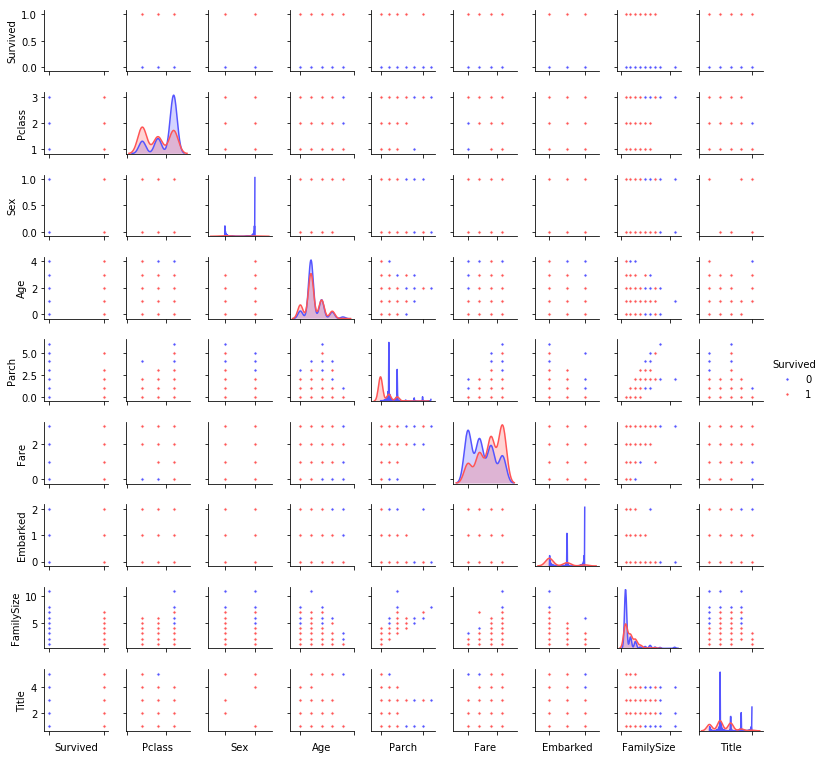

In [49]:
pp = sns.pairplot(titanic_df[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked',
       u'FamilySize', u'Title']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
pp.set(xticklabels=[])

###Model Data

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicit

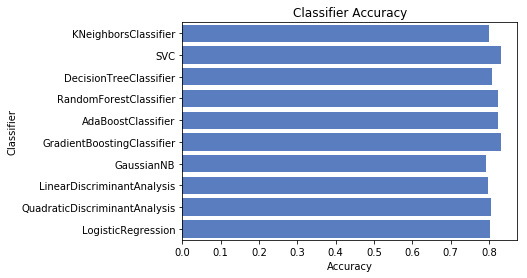

In [51]:
#Compare different ML models' accuracies
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = titanic_df.values[0::, 1::]
y = titanic_df.values[0::, 0]

acc_dict = {}
for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [52]:
#Print Accuracy
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.800000
0,SVC,0.831111
0,DecisionTreeClassifier,0.806667
0,RandomForestClassifier,0.824444
0,AdaBoostClassifier,0.823333
0,GradientBoostingClassifier,0.832222
0,GaussianNB,0.793333
0,LinearDiscriminantAnalysis,0.796667
0,QuadraticDiscriminantAnalysis,0.805556
0,LogisticRegression,0.803333


In [53]:
candidate_classifier = GradientBoostingClassifier()
candidate_classifier.fit(titanic_df.values[0::, 1::], titanic_df.values[0::, 0])
result = candidate_classifier.predict(test_df.values)

In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(candidate_classifier, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[436,  58],
       [ 98, 209]], dtype=int64)

In [55]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7827715355805244
Recall: 0.6807817589576547


In [57]:
#write to csv
submission = pd.DataFrame()
submission["PassengerId"] = pd.read_csv("test_titanic.csv")["PassengerId"]
submission["Survived"] = result
submission.to_csv("submission.csv")